# Example Usage for YoloDetection

## Load Model

In [1]:
%reset -f
import cv2
import matplotlib.pyplot as plt
from util.YoloModel import YoloDetection

yolo_model = YoloDetection(r"models\yolo11n.pt")
print(f"Training imgsz: {yolo_model.training_imgsz}")

Warming up the model...
Warm-up complete.
Training imgsz: 640


## Single Inference

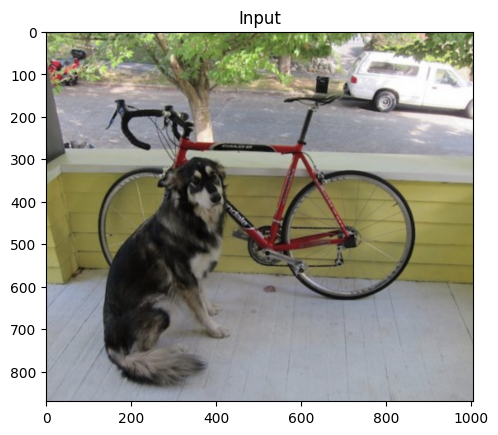

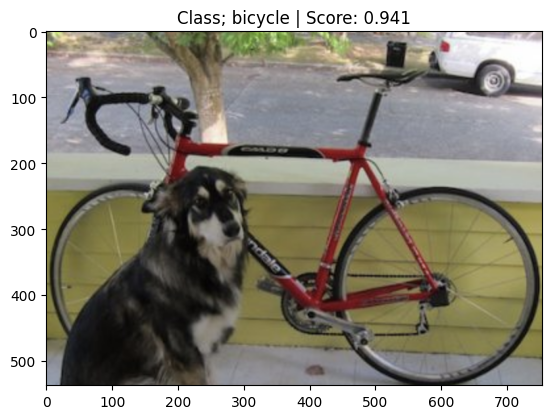

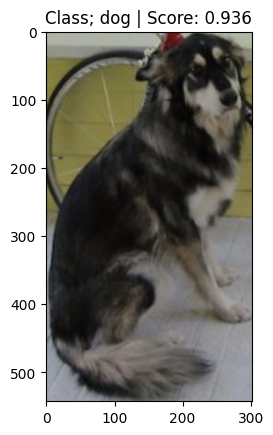

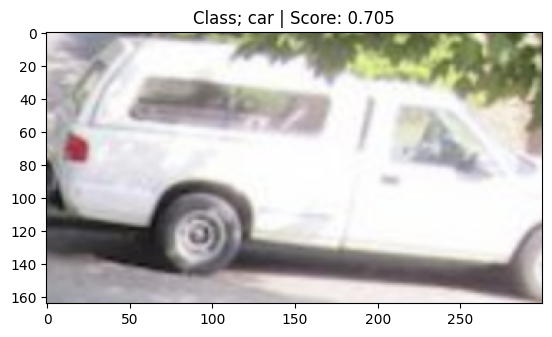

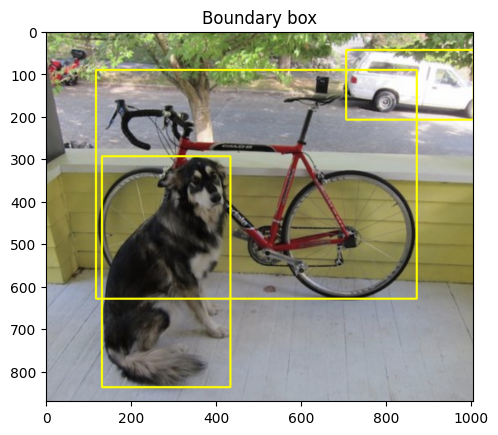

In [2]:
image = cv2.imread(r"images\detect\multiple1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_with_bbox = image.copy()

plt.imshow(image)
plt.title(f"Input")
plt.show()

results = yolo_model.predict(image)
for box, score, cls_name in yolo_model.decode_results(results):

    pt1 = (box[0], box[1])
    pt2 = (box[2], box[3])
    cv2.rectangle(image_with_bbox, pt1, pt2, (255,255,0), 3)
    
    # Crop and plot
    crop_image = yolo_model.extract_object(image, box, 0)
    plt.imshow(crop_image)
    plt.title(f"Class; {cls_name} | Score: {score:.3f}")
    plt.show()

plt.imshow(image_with_bbox)
plt.title(f"Boundary box")
plt.show()    


## Batch Inference

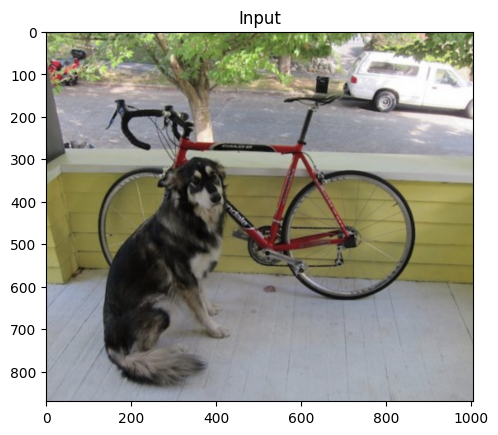

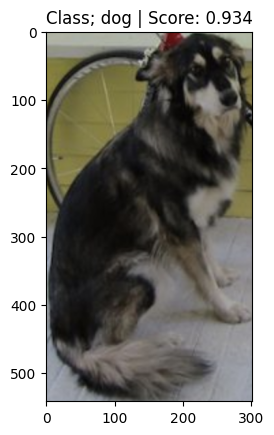

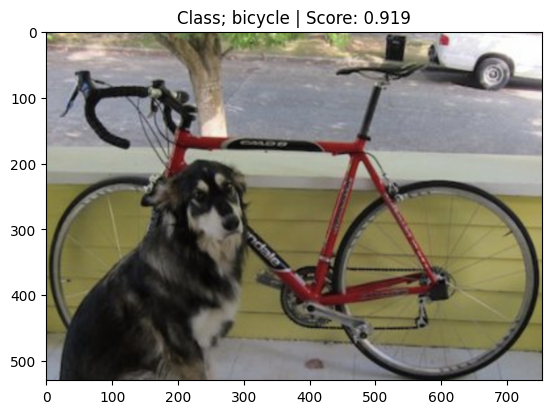

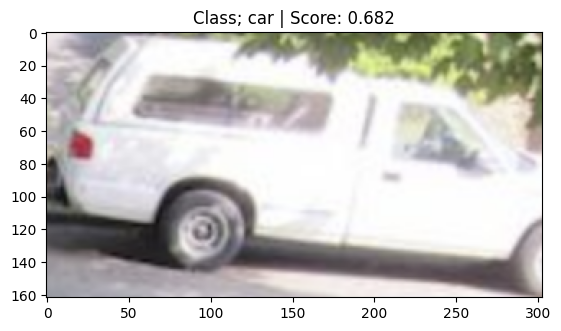

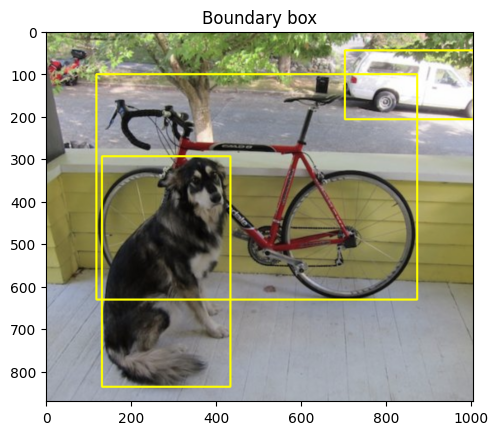

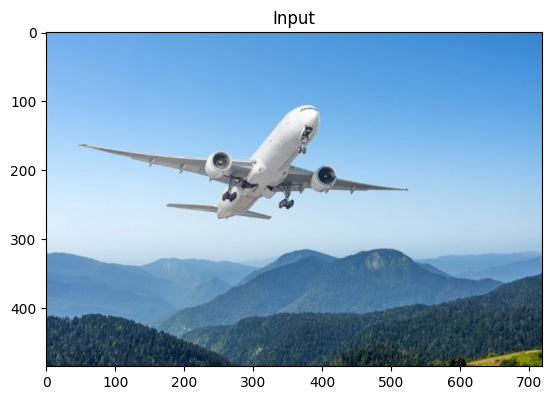

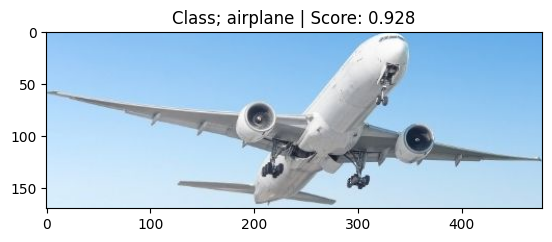

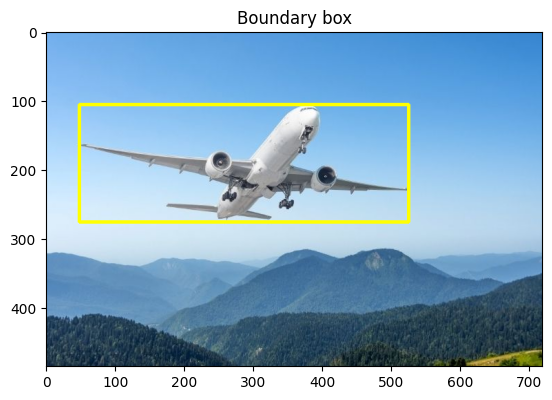

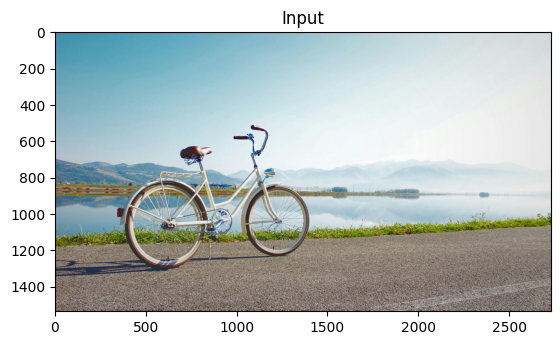

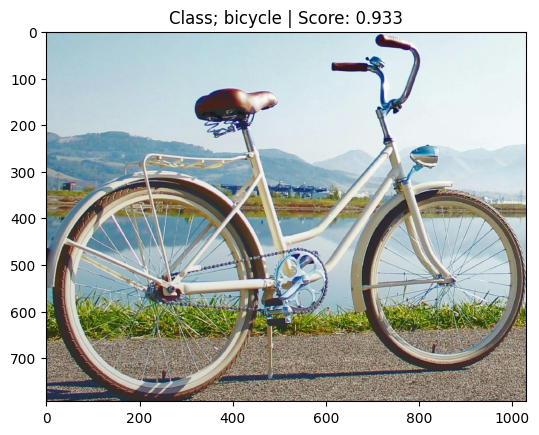

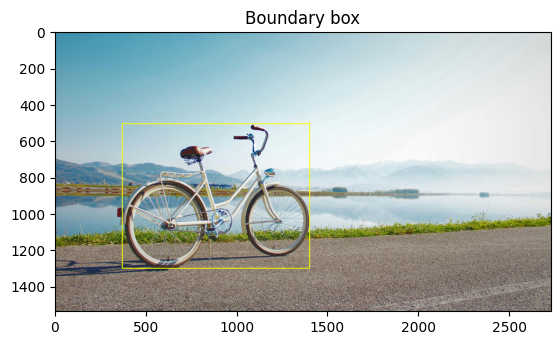

In [3]:
image_list = [
    cv2.imread(r"images\detect\multiple1.png"),
    cv2.imread(r"images\detect\airplane.jpg"),
    cv2.imread(r"images\detect\bicycle.jpg"),
]

results = yolo_model.predict(image_list)
decode_results = yolo_model.decode_results(results)

for image, objects in zip(image_list, decode_results):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_with_bbox = image.copy()
    
    plt.imshow(image)
    plt.title(f"Input")
    plt.show()

    for box, score, cls_name in objects:
        pt1 = (box[0], box[1])
        pt2 = (box[2], box[3])
        cv2.rectangle(image_with_bbox, pt1, pt2, (255,255,0), 3)
        
        # Crop and plot
        crop_image = yolo_model.extract_object(image, box, 0)
        plt.imshow(crop_image)
        plt.title(f"Class; {cls_name} | Score: {score:.3f}")
        plt.show()

    plt.imshow(image_with_bbox)
    plt.title(f"Boundary box")
    plt.show()    

    print("=" * 20)